### IMPORTS AND SET SEED

In [1]:
import cv2 
import numpy as np
import matplotlib
import matplotlib.pyplot as mplplt
import pickle

In [2]:
np.random.seed(0)

### CREATE CUSTOM COLOR MAP BASED ON BRUYNS-HAYLETT ARTICLE

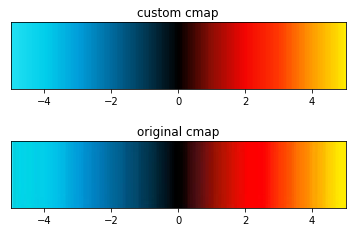

In [3]:
#IMPORT BRUYNS-HAYLETT SCALE AND CONVERT TO RGB
img_bgr = cv2.imread('scale.jpg')
img = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

# CREATE MATPLOTLIB COLORMAP
norm = matplotlib.colors.Normalize(-5, 5)
num_segments=11

r=[]
g=[]
b=[]

normalize_vals = np.linspace(-5,5,num_segments)
br = np.linspace(0,img.shape[1]-1,num_segments).astype(int)

for i in br:
    r.append(img[3][i][0]/255)
    g.append(img[3][i][1]/255)
    b.append(img[3][i][2]/255)

custom_colors=[]
for i in range(num_segments):
    custom_colors.append([norm(normalize_vals[i]),(r[i],g[i],b[i])])

custom_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", custom_colors)

# CREATE MATRIX TO IMITATE BRUYNS-HAYLETT SCALE
diverging_line = np.linspace(-5,5,img.shape[1])
diverging_matrix = []
for i in range(img.shape[0]):
    diverging_matrix.append(diverging_line)
    
# CREATE COMPARISON PLOT
fig,(ax1,ax2) = mplplt.subplots(2,1)
ax1.imshow(diverging_matrix,
           cmap=custom_cmap,
           vmin = diverging_line[0],
           vmax=diverging_line[-1],
           extent=[diverging_line[0],diverging_line[-1],-1,1]
          )
ax2.imshow(img,
           extent=[diverging_line[0],diverging_line[-1],-1,1]
          )
ax1.set_title('custom cmap')
ax2.set_title('original cmap')
ax1.set_yticks([])
ax2.set_yticks([]);

### MAKE SINGLE-VALUE 2D MATRIX REPRESENTATIONS OF BRUYNS-HAYLETT FIGURES

In [4]:
img_bgr = cv2.imread('inh')
img_t = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
img_t = img_t[4:-5,2:-5] #cut away "messy" data along edges, done by visual inspection

#### red

In [5]:
#masks
color_1 = np.asarray([0,0,28])
color_2 = np.asarray([255,255,255])
mask = cv2.inRange(img_t,color_1,color_2)
red_mask = img_t.copy()
red_mask[mask != 0] = (img_t[0,0,0],img_t[0,0,1],img_t[0,0,2])

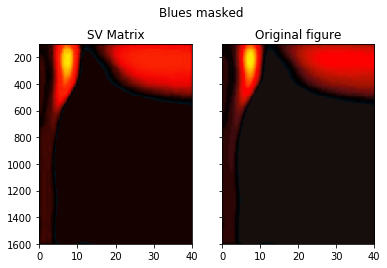

In [143]:
red = []
for i in range(img_t.shape[0]):
    red.append((1*red_mask[i,:,0]).astype(int)+(1*red_mask[i,:,1]).astype(int)+(-2*red_mask[i,:,2]).astype(int))

red = np.asarray(red)
fig,(ax1,ax2)=mplplt.subplots(1,2,sharey=True)
fig.suptitle('Blues masked')
ax1.imshow(red,cmap=custom_cmap,vmax=np.max(red),vmin=-np.max(red),extent=[0,40,1600,100],aspect=.035)
ax2.imshow(red_mask,extent=[0,40,1600,100],aspect=.035)
ax1.set_title('SV Matrix')
ax2.set_title('Original figure');

#### blue

In [29]:
#masks
color_1 = np.asarray([12,0,0])
color_2 = np.asarray([255,255,255])
mask = cv2.inRange(img_t,color_1,color_2)
blue_mask = img_t.copy()
blue_mask[mask != 0] = (img_t[0,0,0],img_t[0,0,1],img_t[0,0,2])

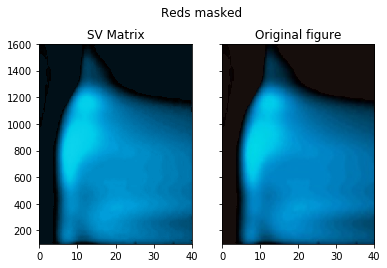

In [145]:
blue = []
for i in range(img_t.shape[0]):
    blue.append((0*blue_mask[i,:,0]).astype(int)+(1*blue_mask[i,:,1]).astype(int)+(0*blue_mask[i,:,2]).astype(int))
blue=np.multiply(blue,-2)

fig,(ax1,ax2)=mplplt.subplots(1,2,sharey=True)
fig.suptitle('Reds masked')
ax1.imshow(blue,cmap=custom_cmap,vmax=500,vmin=-500,extent=[0,40,100,1600],aspect=.035)
ax2.imshow(blue_mask,extent=[0,40,100,1600],aspect=.035)
ax1.set_title('SV Matrix')
ax2.set_title('Original figure');

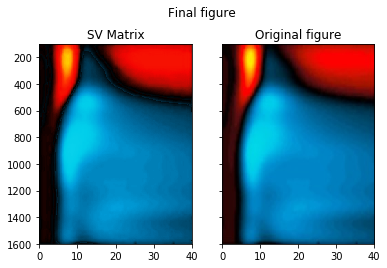

In [148]:
fig,(ax1,ax2)=mplplt.subplots(1,2,sharey=True)
fig.suptitle('Final figure')
ax1.imshow(np.add((blue)/100,red/100),cmap=custom_cmap,vmin=-5,vmax=5,extent=[0,40,1600,100],aspect=.035)
ax2.imshow(img_t,extent=[0,40,1600,100],aspect=.035)
ax1.set_title('SV Matrix')
ax2.set_title('Original figure');

In [ ]:
# bevis for at alle signal kan lages med kerneler via fourier? 
# alle signaler kan skrives som en sum av sinuser. -> alle signaler kan skrives som sum av positiv del av sinus og negativ del av sinus,
# sett in minimum
# høre med tuomo
# kjernene kan skrives, som sum av sinus osv.

# kk = pickle.load(open('scale_factors.p','rb'))
# print(kk)

In [ ]:
import bqplot as bq
from bqplot import pyplot as plt
import math
import ipywidgets as widgets
import scipy.signal as ss
# import matplotlib.pyplot as mplplt

In [ ]:
def calc_signal(change):
    gr=[]
    for j in range(kerns.shape[1]): #channels/depths
        signal_ = np.zeros(data.shape[1])
        for i in range(kerns.shape[0]): #kernels
            lp[i].y = np.interp(np.arange(0,num_tsteps),anchs,scp[i].y)
            lp[i].y[lp[i].y<0]=0
            scp[i].y = lp[i].y[anchs]
            signal_ += ss.convolve(100*lp[i].y,kerns[i][j],mode='same')
        gr.insert(0,signal_)
    heap.color=gr

In [ ]:
L5_kerns = pickle.load(open('data/L5.p', 'rb'))
L23_kerns = pickle.load(open('data/L23.p', 'rb'))
num_kerns = 2 #number of kernels per pop included, hard set for now
LFP_signal = pickle.load(open('data/LFP_lines_30.p', 'rb'))
print(np.shape(LFP_signal))

In [ ]:
kerns = np.flip(np.asarray(np.vstack((L5_kerns,L23_kerns))),axis=1)
num_pops = int(kerns.shape[0]/num_kerns) #number of populations included
data=LFP_signal[1] #LFP inhib off
# data=LFP_signal[0] # LFP inhib on
print(np.min(LFP_signal[0]),np.min(LFP_signal[1]),np.min(LFP_signal[2]),np.min(LFP_signal[3]))

In [ ]:
import cv2 
img_bgr = cv2.imread('scale.jpg')
img = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
mplplt.figure()
mplplt.imshow(img)
mplplt.show()

def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

img_hex=[]
for i in range(img.shape[1]):
    img_hex.append(rgb_to_hex((img[3][i][0],img[3][i][1],img[3][i][2])))

    
img_bgr = cv2.imread('inh')
img_t = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
img_t = img_t[3:-4,1:-5] #crop bad data used cell 180 to decide what is bad
# mplplt.figure()
# mplplt.imshow(img_t)
# mplplt.show()
t_hex = np.chararray((img_t.shape[0],img_t.shape[1]),itemsize=8)

for i in range(img_t.shape[0]):
    for j in range(img_t.shape[1]):
#         print(img_t[i][j])
        t_hex[i][j]=rgb_to_hex((img_t[i][j][0],img_t[i][j][1],img_t[i][j][2]))
#         print(rgb_to_hex((img_t[i][j][0],img_t[i][j][1],img_t[i][j][2])))
# print(t_hex[0][0])
# img_vals = np.zeros((img_t.shape[0],img_t.shape[1]))
# for c in range(len(img_hex)):
#     colr = img_hex[c]
#     print(colr)
#     for i in range(img_vals.shape[0]):
#         for j in range(img_vals.shape[1]):
#             print(img_t[i][j])
# #             if img_t[i][j] ==colr:
#                 print('hei')

# mplplt.figure()
# mplplt.imshow(img_t,cmap=cmupp)
# mplplt.show()
# mplplt.figure()
# mplplt.imshow(img_t,cmap=custom_cmap)
# mplplt.show()
img_long = []
print(np.shape(img))
for i in range(img.shape[1]):
    img_long.append([img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i]])
    img_long.append([img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i]])
    img_long.append([img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i]])
    img_long.append([img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i]])
    img_long.append([img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i]])
    img_long.append([img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i]])

    img_long.append([img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i],img[3][i]])

img_long = np.hstack((img_long,img_long))
img_long = np.hstack((img_long,img_long))

img_long = np.hstack((img_long,img_long))
img_long = np.hstack((img_long,img_long))

img_long = np.hstack((img_long,img_long))
# img_long = np.hstack((img_long,img_long))
# img_long = np.hstack((img_long,img_long))


mplplt.figure()
mplplt.imshow(img_long,aspect='equal')#,interpolation='bilinear')
mplplt.show()
mplplt.figure()
mplplt.imshow(img_long,aspect='equal',interpolation='bessel')
mplplt.show()

# for i in img_long:
#     if img_long not in img_long:
#         print('aaarg')
# fregg = np.mean(img,axis=0)
# print(np.shape(fregg))

# mplplt.figure()
# for i in range(3):
#     mplplt.plot(img[:][:][i])
#     mplplt.plot(fregg[:,i],'k')
# mplplt.show()

# cdict = {'red':}

# img_bgr = cv2.imread('gb.jpg')
# gb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
# mplplt.figure()
# mplplt.imshow(gb)
# mplplt.show()

# mplplt.figure()
# for i in range(3):
#     mplplt.plot(gb[:][:][i])
#     mplplt.plot(np.mean(gb[:][:][i],axis=0))
# mplplt.show()
# print(np.shape(gb))

In [ ]:
# print(np.shape(img))
imgg = np.array(img[0,:,:])
# thing = np.arange(0,len(imgg))
print(np.shape(imgg))
# print(imgg[0],imgg[1])
spacer = np.linspace(-5,5,len(imgg))
# frogg,erg=np.unique(imgg,return_index=True)

imm = np.zeros((img_t.shape[0],img_t.shape[1]))
print(np.shape(imm),np.shape(img_t))
# img og img_t
for c in range(imgg.shape[0]):
    colr = imgg[c]
#     print(np.shape(colr))
    for i in range(img_t.shape[0]):
        for j in range(img_t.shape[1]):
#             print(colr,img_t[i][j])
#             print(np.shape(img_t[i][j]))
#             print(colr.all())
            if colr[0]==img_t[i][j][0] and colr[1]==img_t[i][j][1] and colr[2]==img_t[i][j][2]:
                imm[i][j] = spacer[c]
#             else:
#                 print('br')
#             if colr.all()==img_t[i][j].all():
#                     print(colr,img_t[i][j])

#                 print(spacer[c])
# #                 grob=0
#                 imm[i][j] = spacer[c]
#                 print('mjau')
#         if img_t[i][j] in img:
# #         col = [img_t[i][j][0],img_t[i][j][1],img_t[i][j][2]]
        
# #             if [img_t[i][j][0],img_t[i][j][1],img_t[i][j][2]] in img:
#                 print(np.where(imgg==[img_t[i][j][0],img_t[i][j][1],img_t[i][j][2]]))
# #             print(np.where(img == img_t[i][j]))
# #         if img_t[i][j] not in img:
# #             print('bipp')
# #             print(img_t[i][j])
# #             print(i,img_t.shape[0],j,img_t.shape[1])


In [ ]:
mplplt.figure()
mplplt.imshow(imm,custom_cmap)
mplplt.show()
print(np.min(imm),np.max(imm))

In [ ]:
img_vals = np.chararray((img_t.shape[0],img_t.shape[1]),itemsize=8)


dingo = []
for c in range(len(img_hex)):
    dingo.append(bytes(img_hex[c],'utf-8'))
for c in range(len(img_hex)):
# for c in range(1):
    color = img_hex[c]
#     print(color)
#     print(type(color))
#     color = np.str('#d8cecd')

    colr=bytes(color,'utf-8')
#     print(colr)
#     print(type(colr))
#     print(t_hex[0][0])
#     print(type(t_hex[0][0]))
    for i in range(img_vals.shape[0]):
        for j in range(img_vals.shape[1]):
#             print(colr,t_hex[i][j])
            if t_hex[i][j]==colr:
#                 print('japp')
                img_vals[i][j]=colr
#                 print('hei')
#             print(t_hex[i][j])
#             if img_t[i][j] == colr:
#                 print('hei')
# print(img_vals)

In [ ]:
no = 0
yes = 0
for i in range(img_vals.shape[0]):
    for j in range(img_vals.shape[1]):
        if t_hex[i][j] not in dingo:
            no +=1
#             print(t_hex[i][j])
#             print('eh')
        else:
#             print(t_hex[i][j])

            yes +=1
print(yes,no)

### create custom color map

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.colors

cmupp = matplotlib.colors.ListedColormap(img_hex[::-1])
cmupp = matplotlib.colors.ListedColormap(img_hex)

all_c = []
for i in range(custom_cmap.N):
    rgb = custom_cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
    all_c.append(matplotlib.colors.rgb2hex(rgb))
# print(all_c)
all_c2 = []
for i in range(cmupp.N):
    rgb = cmupp(i)[:3] # will return rgba, we take only first 3 so we get rgb
    all_c2.append(matplotlib.colors.rgb2hex(rgb))

    
all_c = all_c2#[::-1]
# mplplt.figure()
# mplplt.imshow(img)
# # mplplt.imshow(LFP_signal[0],cmap=cmupp)
# mplplt.show()
    
    

# all_c = img_hex #################
# print(all_c)
col_sc_uno = bq.ColorScale(colors=all_c)
col_sc_dos = bq.ColorScale(colors=all_c)


colr = np.linspace(-1,1,len(all_c))#*5
colr_on = np.linspace(-1,1,len(all_c))#*5

colr_full = np.linspace(-1,1,len(all_c))
inh_off = LFP_signal[1][::-1]/np.max(np.abs(LFP_signal[1]))#*5
inh_on = LFP_signal[0][::-1]/np.max(np.abs(LFP_signal[0]))#*5

iih = LFP_signal[3]
print(np.min(iih),np.max(iih))

mplplt.figure(figsize=(10,10))
mplplt.imshow(iih,cmap=cmupp,vmin=-5,vmax=5,aspect=8)
# mplplt.colorbar(bipp)
mplplt.show()

#vil vel bruke icsd for tilpassing av fargeskala
# inh_off = LFP_signal[3][::-1]/np.max(np.abs(LFP_signal[3]))*5

signal_cs= bq.HeatMap(color=inh_off,
                           scales={'color':col_sc_uno}
                     )
signal_cs_on= bq.HeatMap(color=inh_on,
                           scales={'color':col_sc_dos}
                     )
# print(signal_cs.color[10])
# colr = np.linspace(np.min(inh_off),np.max(inh_off),len(all_c))

# print(colr)
colr = colr[colr<=np.max(signal_cs.color)]
colr = colr[colr>=np.min(signal_cs.color)]
colr_on = colr_on[colr_on<=np.max(signal_cs_on.color)]
colr_on = colr_on[colr_on>=np.min(signal_cs_on.color)]
# print(colr)
colers =[]
colers_on=[]
for i in range(len(colr)):
    if colr_full[i] in colr:
        rgb = custom_cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
        colers.append(matplotlib.colors.rgb2hex(rgb))

for i in range(len(colr_on)):
    if colr_full[i] in colr_on:
        rgb = custom_cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
        colers_on.append(matplotlib.colors.rgb2hex(rgb))


In [ ]:
layers = [1,7]
num_kernels=kerns.shape[0]
num_tsteps = data.shape[1]
kernel_tsteps = kerns.shape[2]
t_min=0
t_max=30.
num_channels = kerns.shape[1]
num_anch=20 #minimum 3

t=np.linspace(t_min,t_max,num_tsteps)

In [ ]:
xb = bq.LinearScale(min=0,max=401)
yb=bq.LinearScale(min=0,max=1)

xs = bq.LinearScale(min=0,max=30)
ys_fr = bq.LinearScale(min=0)

xs_kernel = bq.LinearScale(min=0,max=118)
ys = bq.LinearScale(min=-4,max=1)
xax = bq.Axis(scale=xs, label='t', grid_lines='solid')
yax_fr = bq.Axis(scale=ys_fr, orientation='vertical', tick_format='0.2f', label='y', grid_lines='solid')
xax_2 = bq.Axis(scale=xb, label='t', grid_lines='none',tick_format='None')
yax_fr_2 = bq.Axis(scale=yb, orientation='vertical', tick_format='None', label='y', grid_lines='none')

xax_k = bq.Axis(scale=xs_kernel, orientation='horizontal',label='t', grid_lines='solid',tick_format='0.002f')
yax_k = bq.Axis(scale=yb, orientation='vertical', tick_format='None', label='y', grid_lines='solid')


yax = bq.Axis(scale=ys, orientation='vertical', tick_format='0.2f', label='y', grid_lines='solid')



t_data = np.linspace(t_min,t_max,num_tsteps)
x_data=np.arange(num_tsteps)


count = int(np.floor((num_tsteps-1)/(num_anch-1)))
remainder = (num_tsteps-1)%(num_anch-1)
anchs=[0]
for i in range(num_anch-1):
    if i < remainder:
        anchs=np.hstack((anchs,(i+1)*(count+1)))
    else:
        anchs=np.hstack((anchs,(remainder)*(count+1)+count*(i+1-remainder)))

anchor_y = np.zeros(num_anch) #setting all to 0 wrecks it, why?!?!? Same for creators toturial examples, so just make a warning.
anchor_y[-1]=1
y_data = np.interp(np.arange(0,num_tsteps),anchs,anchor_y)

x_a = anchs*30/118
y_a = anchor_y

In [ ]:
LFP_in = bq.Lines(x=t_data,y=LFP_signal[0][0],scales={'x': xs, 'y': ys},colors=['red'])
LFP_off = bq.Lines(x=t_data,y=LFP_signal[1][0],scales={'x': xs, 'y': ys},colors=['blue'])
import matplotlib.pyplot as mplplt
tt  = np.arange(kernel_tsteps+1)
plt.figure(title='Firing rates')
signal_init=np.zeros(data.shape[1])

hm_init=np.zeros((data.shape))

scp = []
lp=[]
labels = ['L5a_e','L5b_e','L23a_e','L23b_e']
label_colors=['red','blue','green','purple']
label_heights=[0.2,0.4,0.6,0.8]

fig_layout = widgets.Layout(width='100%',height='400px')


inh_off = LFP_signal[1][::-1]#/np.max(np.abs(LFP_signal[1]))*5
inh_on = LFP_signal[0][::-1]#/np.max(np.abs(LFP_signal[0]))*5
icsd_off = LFP_signal[3][::-1]#/np.max(np.abs(LFP_signal[3]))*5
col_sc = bq.ColorScale(colors=all_c,mid=0)
# col_sc = bq.ColorScale()
col_sc_bar = bq.ColorScale(colors=all_c,mid=0)

col_sc2 =bq.ColorScale(colors=colers_on)#,mid=0)
col_sc3 =bq.ColorScale(colors=colers)#,mid=0)
col_sc_full = bq.ColorScale(colors=all_c,mid=0,max=5,min=-5)
# col_sc_full = bq.ColorScale(colors=all_c,mid=0)#,max=5,min=-5)

# cax = bq.ColorAxis(scale=col_sc3,colors=[-1,1])
# ccax = bq.ColorAxis(scale=col_sc,colors=[-10,10])


heap = bq.HeatMap(color=hm_init,
                  scales={'color':col_sc},
#                 axes_options = {'color': {'orientation': 'vertical', 'side': 'right'}}
                 )
# signal_inh_on = bq.HeatMap(color=inh_on,scales={'color':col_sc2})
signal_inh_on = bq.HeatMap(color=inh_on,scales={'color':col_sc_full})

signal_icsd_off = bq.HeatMap(color=icsd_off,scales={'color':col_sc_full})

signal_inh_off= bq.HeatMap(color=inh_off,
#                            axes=cax,
#                            scales={'color':col_sc3},
                           scales={'color':col_sc_full},

                           axes_options = {'color': {'orientation': 'vertical', 'side': 'right'}})

scp=[]
lp=[]
sl=[]
kl=[]
for i in range(4):
    scatter_plot = plt.scatter(x_a, y_a,scales={'x': xs, 'y': ys_fr},colors=[label_colors[i]],enable_move=True,restrict_y=True)
    scp.append(scatter_plot)
    line_plot = bq.Lines(x=t_data,y=y_data,scales={'x': xs, 'y': ys_fr},colors=[label_colors[i]],enable_move=True,restrict_y=True)
    lp.append(line_plot)
    slider_label = bq.Label(x=[0.1], y=[0.8], text=[labels[i]], default_size=26,
                   font_weight='bolder', colors=[label_colors[i]])
    sl.append(slider_label)
    kernel_label = bq.Label(x=[0.1], y=[label_heights[i]], text=[labels[i]], default_size=26,
                  font_weight='bolder', colors=[label_colors[i]])
    kl.append(kernel_label)
    scp[i].observe(calc_signal,['y'])
figx=[]
for i in range(4):
    figx.append(bq.Figure(layout=fig_layout,axes=[xax,yax_fr],marks=[sl[i],lp[i],scp[i]]))
figy=[]
figy.append(widgets.HBox(figx))
figy.append(widgets.HBox([bq.Figure(
                                title='convolution',
    min_aspect_ratio=1,
    max_aspect_ratio=1,
#                                 fig_margin = dict(top=50, bottom=70, left=50, right=200),
#                                 axes=[ccax],
#                     axes_options = {'color': {'orientation': 'vertical', 'side': 'right'}},

#                                 scales={'color':col_sc},
#                                 color=signal_inh_off,
                                marks=[heap]),
                          bq.Figure(
                              title='inh_off',
                                  min_aspect_ratio=1,
                                    max_aspect_ratio=1,
                              marks=[signal_inh_off]),
                          bq.Figure(
                              title='inh_on',
                                  min_aspect_ratio=1,
                                    max_aspect_ratio=1,
#                               fig_margin = dict(top=50, bottom=70, left=50, right=200),
#                                     color=signal_inh_off,
#                                     axes=[cax],
                                    marks=[signal_inh_on])]))
#                                     marks=[signal_icsd_off])]))

# figy.append(bq.Figure(marks=[heap]))
display(widgets.VBox(figy))